In [48]:
%matplotlib inline

import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import signal
import seaborn

In [49]:
def newrange(image, minval=0, maxval=255):
    """Rescales input image to a new range. Handy for displaying images."""
    return (image - np.min(image))*(maxval - minval)/(np.max(image) - np.min(image))

(-0.5, 762.5, 762.5, -0.5)

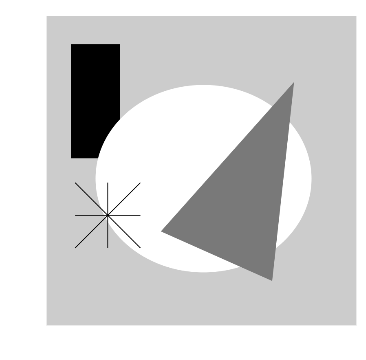

In [50]:
im = cv2.imread('assets/images/gray_shapes.png', cv2.IMREAD_GRAYSCALE)
smooth = np.array([[1, 2, 3, 2, 1]])/9
smooth_im = signal.convolve2d(im, smooth, mode='same', boundary='symm')

row = 100
col_start = 170
col_end = 190
hy3 = np.array([[1, 0, -1]])
hy5 = np.array([[1, 2, 0, -2, -1]])

plt.imshow(im, cmap='gray')
plt.axis('off')

In [ ]:
# Create rgb image in order to draw red cross section line
bgr_im = np.dstack((im, im, im))

print(bgr_im.shape)

# Put on red color at the cross section (and make it a bit wider)
for r in range(row-1, row+2):
    for c in range(col_start, col_end):
        bgr_im[r, c, :] = [0, 0, 255]
        
# Notice that pyplot expect rgb image, opencv expect bgr image

plt.imshow(bgr_im)
plt.axis('off')

cv2.imwrite('assets/images/shapes_with_cross_section.png', bgr_im)

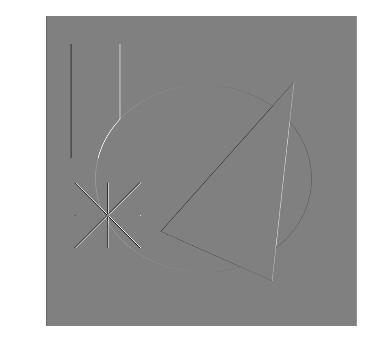

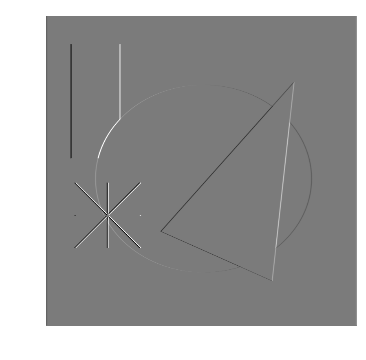

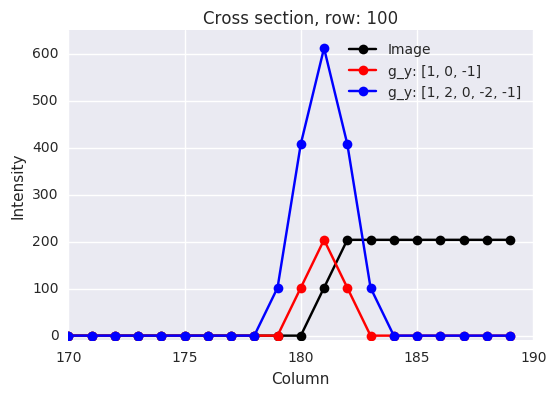

In [74]:
gy3 = signal.convolve2d(im, hy3, mode='same', boundary='symm')
gy5 = signal.convolve2d(im, hy5, mode='same', boundary='symm')

plt.figure(0)
plt.imshow(gy3, cmap='gray')
plt.axis('off')

plt.figure(1)
plt.imshow(gy5, cmap='gray')
plt.axis('off')

plt.figure(2)
plt.plot(range(col_start, col_end), im[row, col_start:col_end], 'ko-', label='Image')
plt.plot(range(col_start, col_end), gy3[row, col_start:col_end], 'ro-', label='g_y: [1, 0, -1]')
plt.plot(range(col_start, col_end), gy5[row, col_start:col_end], 'bo-', label='g_y: [1, 2, 0, -2, -1]')
plt.legend()
plt.ylim([-10, 650])
plt.title('Cross section, row: ' + str(row))
plt.xlabel('Column')
plt.ylabel('Intensity')

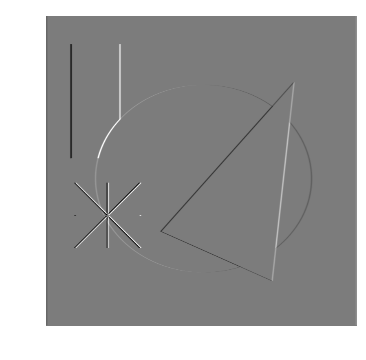

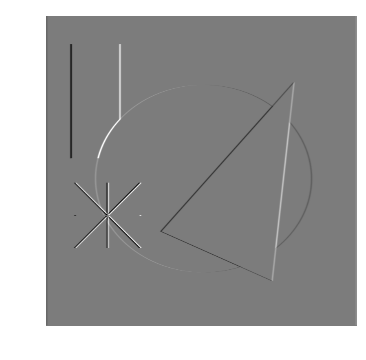

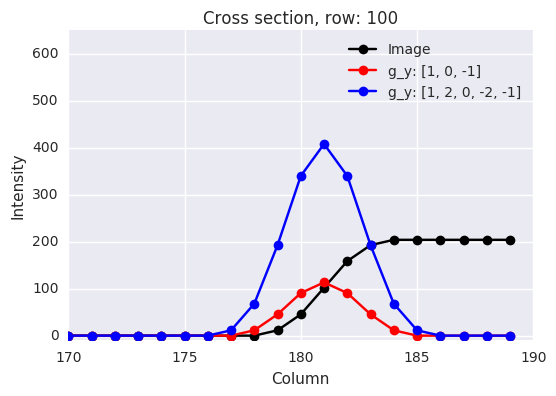

In [75]:
gy3 = signal.convolve2d(smooth_im, hy3, mode='same', boundary='symm')
gy5 = signal.convolve2d(smooth_im, hy5, mode='same', boundary='symm')

plt.figure(0)
plt.imshow(gy3, cmap='gray')
plt.axis('off')

plt.figure(1)
plt.imshow(gy5, cmap='gray')
plt.axis('off')

plt.figure(2)
plt.plot(range(col_start, col_end), smooth_im[row, col_start:col_end], 'ko-', label='Image')
plt.plot(range(col_start, col_end), gy3[row, col_start:col_end], 'ro-', label='g_y: [1, 0, -1]')
plt.plot(range(col_start, col_end), gy5[row, col_start:col_end], 'bo-', label='g_y: [1, 2, 0, -2, -1]')
plt.legend()
plt.ylim(-10, 650)
plt.title('Cross section, row: ' + str(row))
plt.xlabel('Column')
plt.ylabel('Intensity')

In [59]:
lap3 = np.array([[-1, 2, -1]])
lap5 = np.array([[-1, 0, 2, 0, -1]])

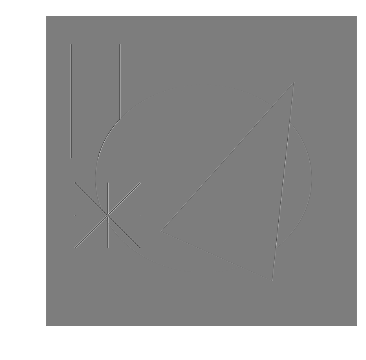

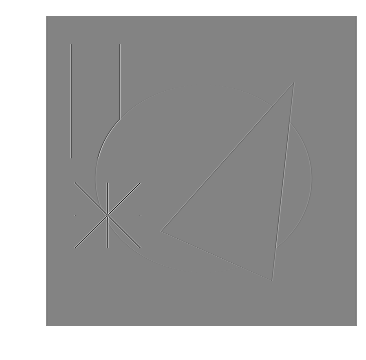

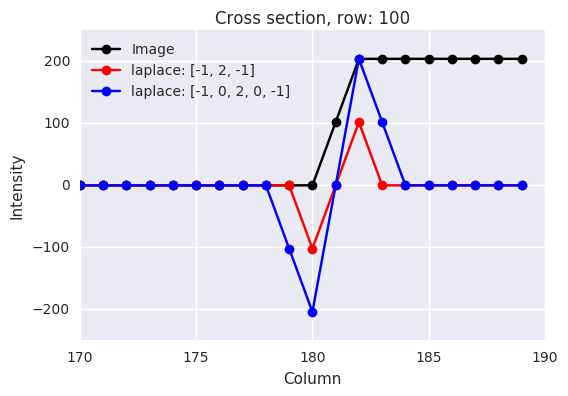

In [76]:
lapim3 = signal.convolve2d(im, lap3, mode='same', boundary='symm')
lapim5 = signal.convolve2d(im, lap5, mode='same', boundary='symm')

plt.figure(0)
plt.imshow(lapim3, cmap='gray')
plt.axis('off')

plt.figure(1)
plt.imshow(lapim5, cmap='gray')
plt.axis('off')

plt.figure(2)
plt.plot(range(col_start, col_end), im[row, col_start:col_end], 'ko-', label='Image')
plt.plot(range(col_start, col_end), lapim3[row, col_start:col_end], 'ro-', label='laplace: [-1, 2, -1]')
plt.plot(range(col_start, col_end), lapim5[row, col_start:col_end], 'bo-', label='laplace: [-1, 0, 2, 0, -1]')
plt.legend(loc=2)
plt.ylim(-250, 250)
plt.title('Cross section, row: ' + str(row))
plt.xlabel('Column')
plt.ylabel('Intensity')

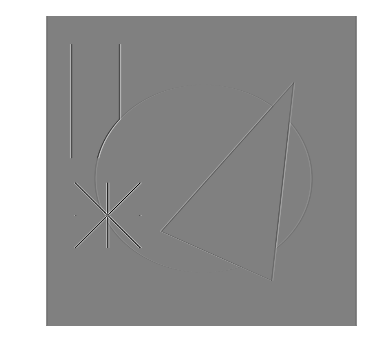

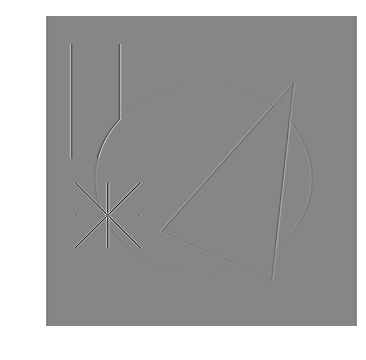

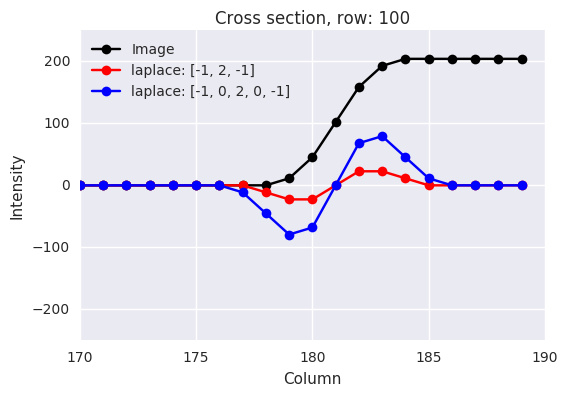

In [77]:
lapim3 = signal.convolve2d(smooth_im, lap3, mode='same', boundary='symm')
lapim5 = signal.convolve2d(smooth_im, lap5, mode='same', boundary='symm')

plt.figure(0)
plt.imshow(lapim3, cmap='gray')
plt.axis('off')

plt.figure(1)
plt.imshow(lapim5, cmap='gray')
plt.axis('off')

plt.figure(2)
plt.plot(range(col_start, col_end), smooth_im[row, col_start:col_end], 'ko-', label='Image')
plt.plot(range(col_start, col_end), lapim3[row, col_start:col_end], 'ro-', label='laplace: [-1, 2, -1]')
plt.plot(range(col_start, col_end), lapim5[row, col_start:col_end], 'bo-', label='laplace: [-1, 0, 2, 0, -1]')
plt.legend(loc=2)
plt.ylim(-250, 250)
plt.title('Cross section, row: ' + str(row))
plt.xlabel('Column')
plt.ylabel('Intensity')